In [4]:
# Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn & ML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from xgboost import XGBClassifier
import joblib

# SHAP for explainability
import shap

# Load dataset
df = pd.read_csv("CreditCard.zip")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

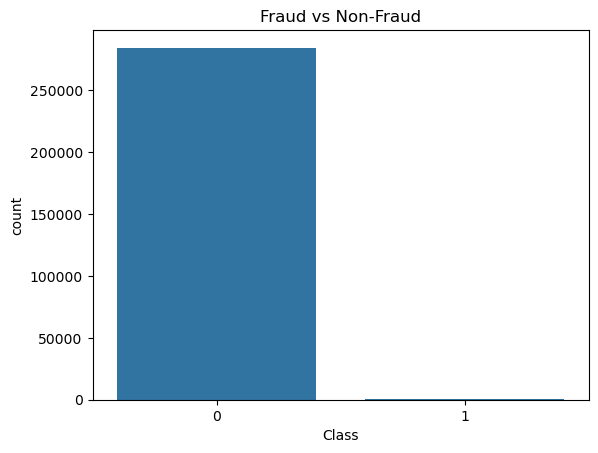

Class
0    284315
1       492
Name: count, dtype: int64


In [10]:
sns.countplot(x='Class', data=df)
plt.title("Fraud vs Non-Fraud")
plt.show()
print(df['Class'].value_counts())

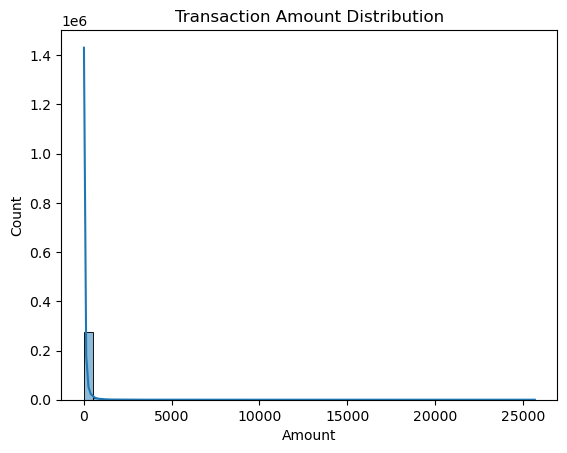

In [12]:
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title("Transaction Amount Distribution")
plt.show()

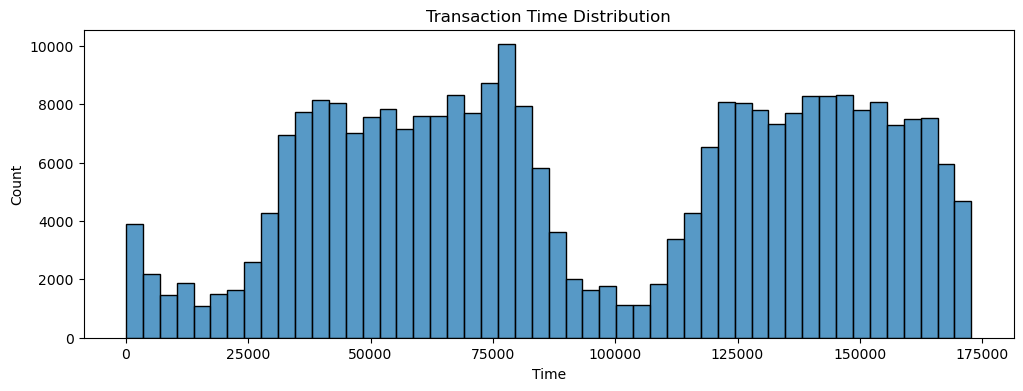

In [13]:
plt.figure(figsize=(12,4))
sns.histplot(df['Time'], bins=50)
plt.title("Transaction Time Distribution")
plt.show()

In [14]:
df = df.drop(['Time'], axis=1)

In [15]:
X = df.drop('Class', axis=1)
y = df['Class']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
model = XGBClassifier(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    scale_pos_weight=10,
    random_state=42
)
model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

In [20]:
y_pred = model.predict(X_test_scaled)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:,1])
print("ROC AUC Score:", roc_auc)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.89      0.83      0.86        98

    accuracy                           1.00     56962
   macro avg       0.94      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
 [[56854    10]
 [   17    81]]
ROC AUC Score: 0.9736173239695427


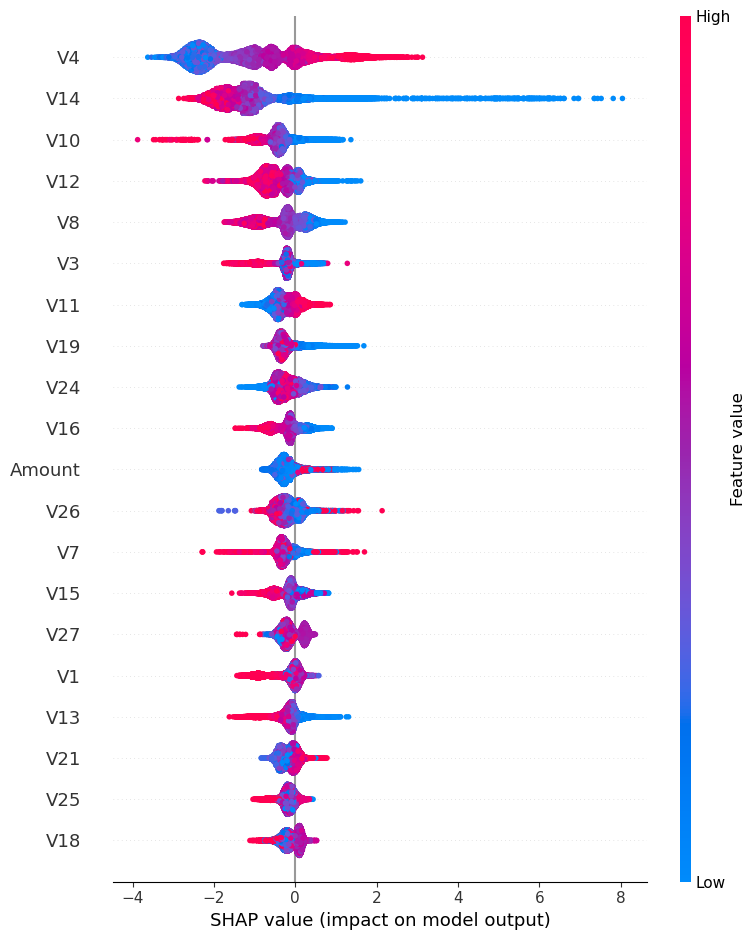

In [22]:
explainer = shap.Explainer(model)
shap_values = explainer(X_test_scaled)

# Summary plot
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

In [25]:
import os
# Ensure models folder exists
if not os.path.exists("models"):
    os.makedirs("models")

# Save
joblib.dump(model, "models/fraud_model.pkl")
joblib.dump(scaler, "models/scaler.pkl")
print("Model and scaler saved successfully!")

Model and scaler saved successfully!


In [26]:
def predict_transaction(transaction):
    transaction_scaled = scaler.transform([transaction])
    prediction = model.predict(transaction_scaled)
    return "Fraud" if prediction[0]==1 else "Legit"

# Test prediction
sample_txn = X_test.iloc[0].tolist()
print("Prediction:", predict_transaction(sample_txn))


Prediction: Legit


C:\Users\dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


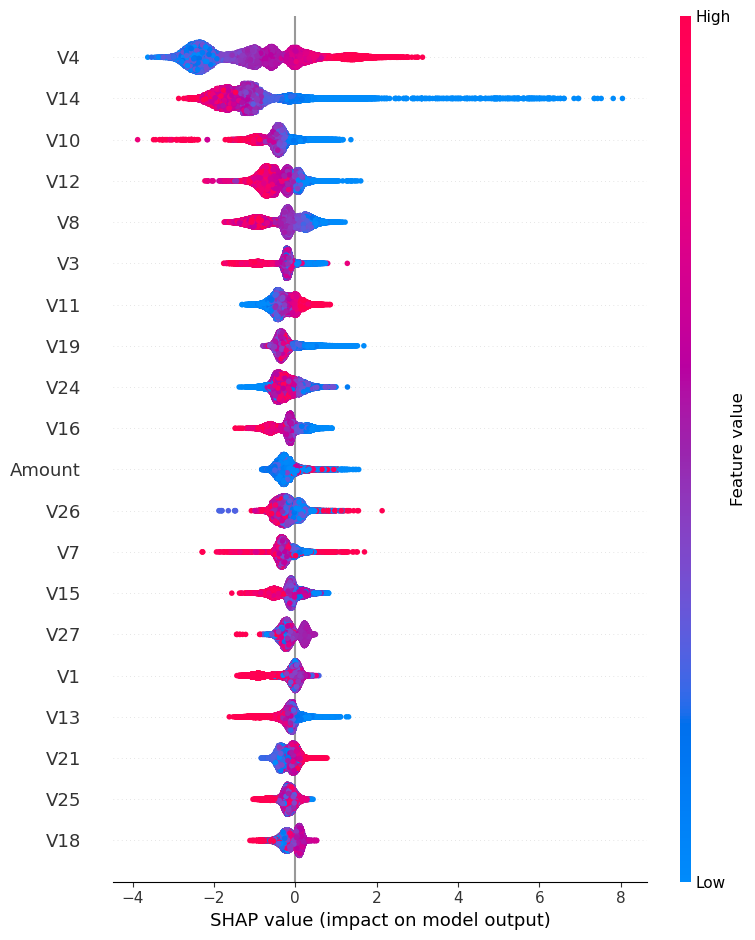

In [28]:
# Create SHAP explainer
explainer = shap.Explainer(model)
shap_values = explainer(X_test_scaled)

# Summary plot
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

In [31]:
def predict_transaction(transaction):
    # Convert the input list to a DataFrame with same column names
    transaction_df = pd.DataFrame([transaction], columns=X_test.columns)
    # Scale
    transaction_scaled = scaler.transform(transaction_df)
    # Predict
    prediction = model.predict(transaction_scaled)
    return "Fraud" if prediction[0] == 1 else "Legit"

In [32]:
# Predict first 5 transactions in test set
for i in range(5):
    txn = X_test.iloc[i].tolist()
    print(f"Transaction {i+1}: {predict_transaction(txn)}")

Transaction 1: Legit
Transaction 2: Legit
Transaction 3: Legit
Transaction 4: Legit
Transaction 5: Legit
